In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score


In [2]:
np.random.seed(42)

X = np.linspace(1, 10, 200)
noise = np.random.normal(0, 15, 200)

y = 20 + 5*X + 1.2*(X**2) + noise

data = pd.DataFrame({
    "Study_Hours": X,
    "Marks": y
})


In [3]:
data

,Study_Hours,Marks
0,1.000000,33.650712
1,1.045226,24.463163
2,1.090452,36.594493
3,1.135678,50.071558
4,1.180905,24.065665
...,...,...
195,9.819095,190.572801
196,9.864322,172.829555
197,9.909548,189.692579
198,9.954774,189.564027


In [4]:
data.head()

,Study_Hours,Marks
0,1.000000,33.650712
1,1.045226,24.463163
2,1.090452,36.594493
3,1.135678,50.071558
4,1.180905,24.065665


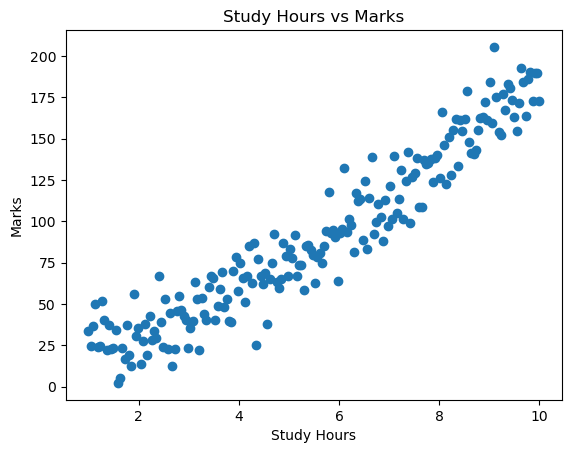

In [5]:
plt.scatter(data["Study_Hours"], data["Marks"])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks")
plt.show()


In [6]:
X = data[["Study_Hours"]]   # Feature (2D)
y = data["Marks"]           # Target


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)


In [10]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test_scaled)


In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test_scaled.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)



In [14]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("Adjusted R2:", adjusted_r2)


MSE: 174.33222223912122
RMSE: 13.203492804524158
R2: 0.9196595775431063
Adjusted R2: 0.9153168520048959


E:\D\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


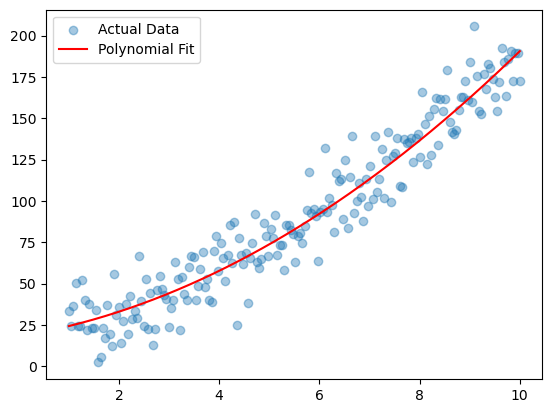

In [15]:
X_curve = np.linspace(1, 10, 300).reshape(-1,1)
X_curve_poly = poly.transform(X_curve)
X_curve_scaled = scaler.transform(X_curve_poly)

y_curve = model.predict(X_curve_scaled)

plt.scatter(X, y, alpha=0.4, label="Actual Data")
plt.plot(X_curve, y_curve, color="red", label="Polynomial Fit")
plt.legend()
plt.show()


In [17]:
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred_pipe = pipe.predict(X_test)


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

def poly_regression(degree, X_train, y_train):
    # New data for smooth curve
    X_new = np.linspace(-3, 3, 200).reshape(-1, 1)

    pipe = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

    # Training
    pipe.fit(X_train, y_train)

    # Prediction
    y_pred_new = pipe.predict(X_new)

    return X_new, y_pred_new, pipe
